In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the Data

In [ ]:
df= pd.read_csv('/content/heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


In [ ]:
df['HeartDisease']=df['HeartDisease'].astype('category')

In [ ]:
df['FastingBS']=df['FastingBS'].astype('category')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


#EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

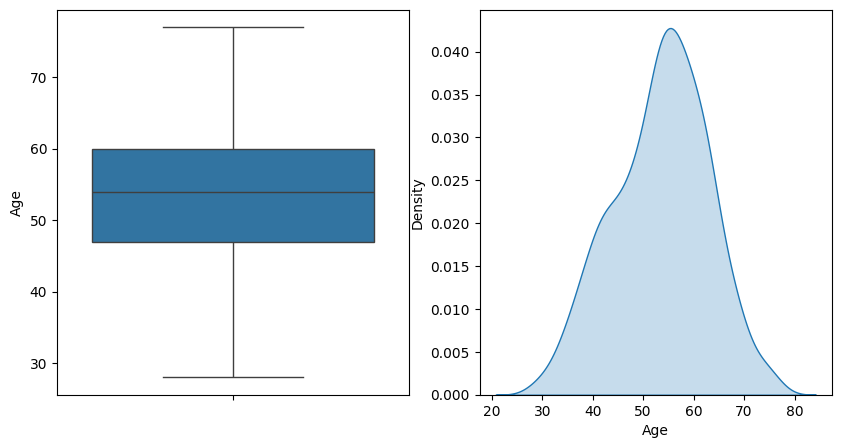

In [ ]:
#Age
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(df['Age'])
plt.subplot(1, 2, 2)
sns.kdeplot(df['Age'], fill=True)
plt.show()

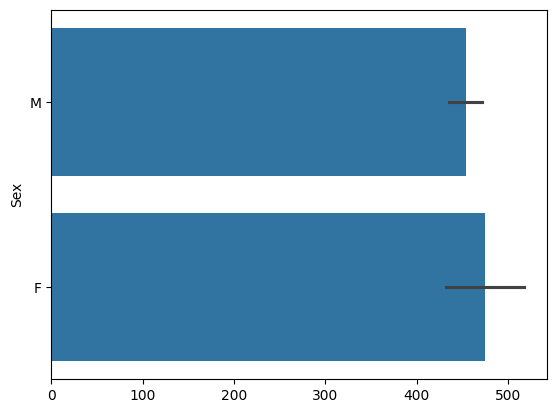

In [ ]:
#Sex
#distribution
sns.barplot(df['Sex'], fill=True)
plt.show()

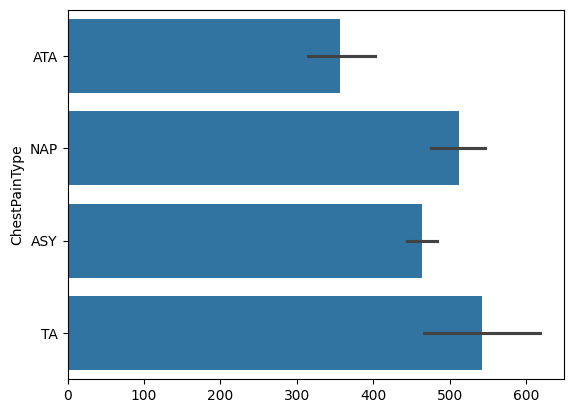

In [ ]:
#ChestPainType
# distribution
sns.barplot(df['ChestPainType'], fill=True)
plt.show()

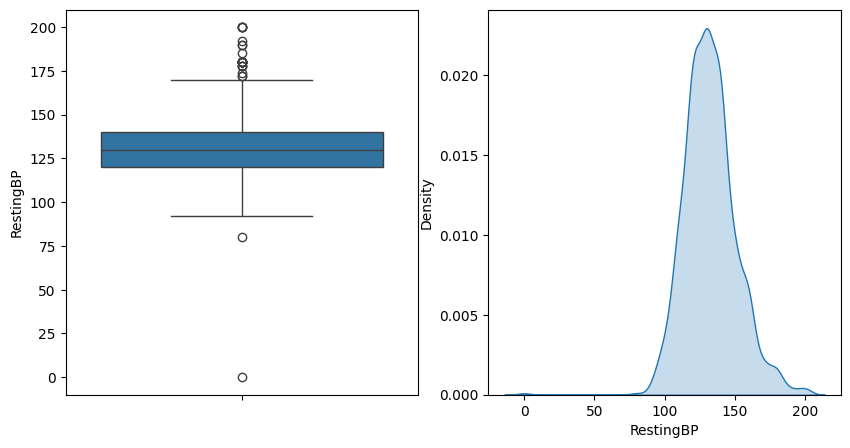

In [ ]:
#RestingBP
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(df['RestingBP'])
plt.subplot(1, 2, 2)
sns.kdeplot(df['RestingBP'], fill=True)
plt.show()

In [ ]:
print("min:",np.min(df['RestingBP']))
print("max:",np.max(df['RestingBP']))

min: 0
max: 200


In [ ]:
df.groupby("RestingBP").agg(count=("RestingBP","count"))


,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


In [ ]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df.drop(df[df['RestingBP']==0].index, inplace=True)

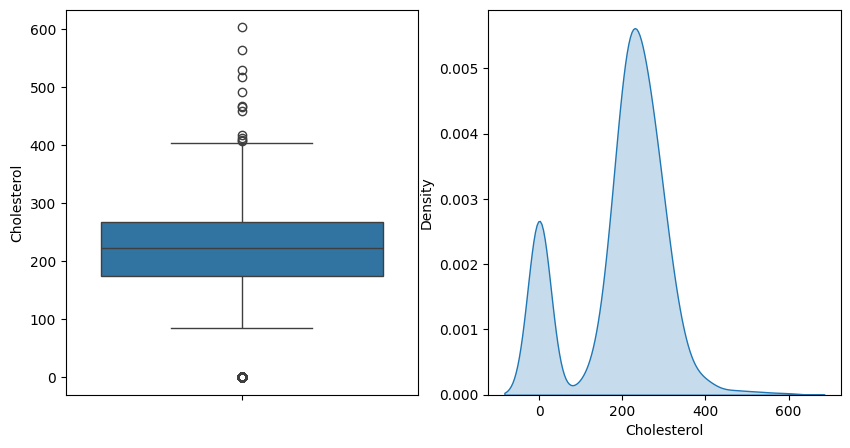

In [ ]:
#Cholesterol
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(df['Cholesterol'])
plt.subplot(1, 2, 2)
sns.kdeplot(df['Cholesterol'], fill=True)
plt.show()

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,171
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
df['Cholesterol']=np.where(df['Cholesterol']==0,df['Cholesterol'].median(),df['Cholesterol'])

In [ ]:
df[df['Cholesterol']>=400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468.0,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518.0,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412.0,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529.0,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466.0,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603.0,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,140,404.0,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,135,491.0,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458.0,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564.0,0,LVH,160,N,1.6,Flat,0


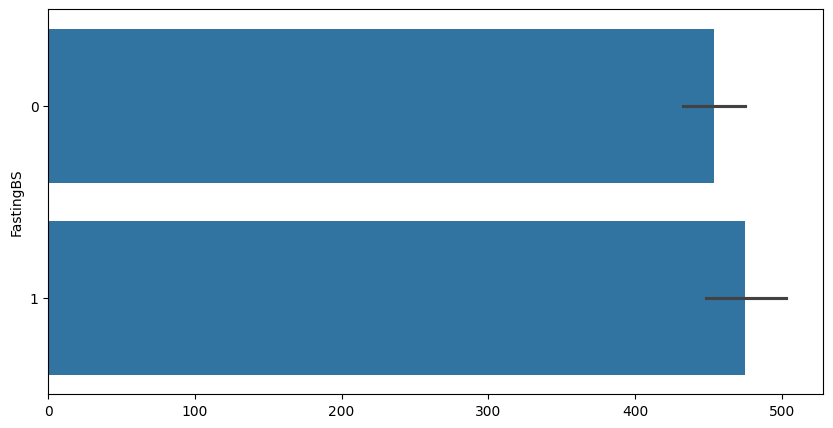

In [ ]:
#FastingBS
#distribution
fig=plt.figure(figsize=(10,5))
sns.barplot(df['FastingBS'], fill=True)
plt.show()

In [ ]:
df['FastingBS'].value_counts()

,count
FastingBS,
0,703
1,214


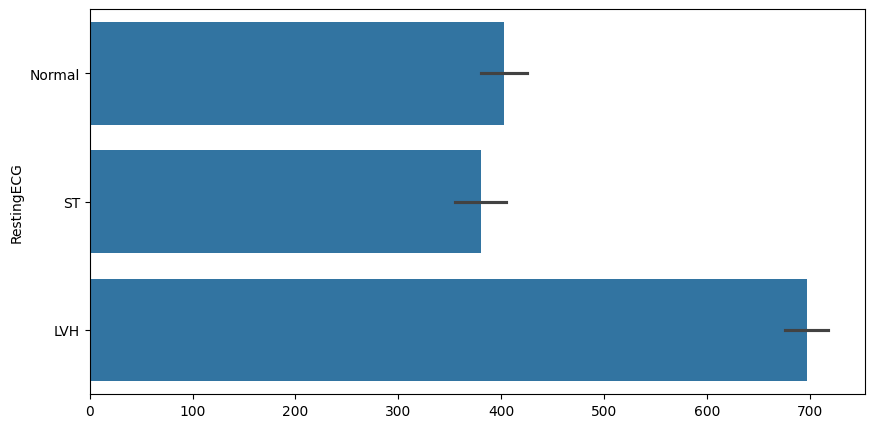

In [ ]:
#RestingECG
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
sns.barplot(df['RestingECG'], fill=True)
plt.show()

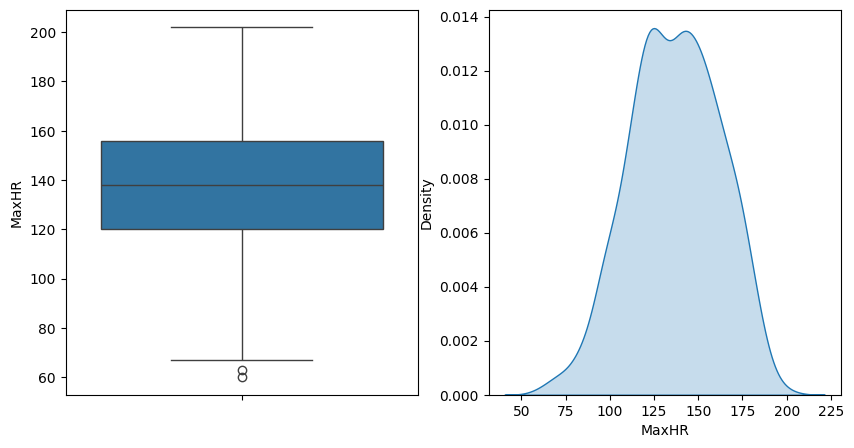

In [ ]:
#MaxHR
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(df['MaxHR'])
plt.subplot(1, 2, 2)
sns.kdeplot(df['MaxHR'], fill=True)
plt.show()

In [ ]:
q1=df['MaxHR'].quantile(0.25)
q3=df['MaxHR'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df[df['MaxHR']<=lower_bound]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,223.0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,223.0,0,Normal,60,N,0.0,Flat,1


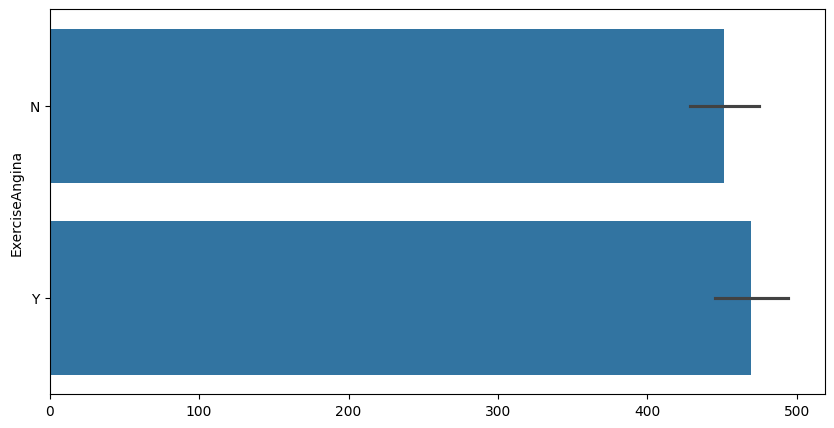

In [ ]:
#ExerciseAngina
#distribution
fig=plt.figure(figsize=(10,5))
sns.barplot(df['ExerciseAngina'], fill=True)
plt.show()

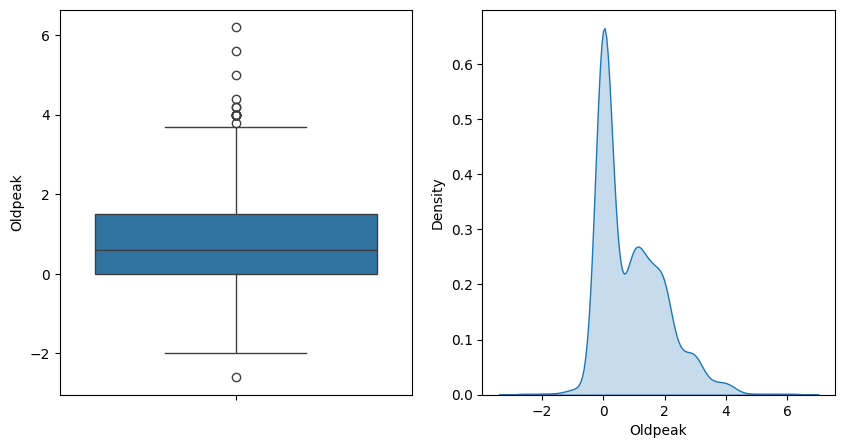

In [ ]:
#Oldpeak
# boxplot and distribution
fig=plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(df['Oldpeak'])
plt.subplot(1, 2, 2)
sns.kdeplot(df['Oldpeak'], fill=True)
plt.show()

In [ ]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,223.0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,223.0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,223.0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,223.0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,223.0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,223.0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,223.0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,223.0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,223.0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,223.0,1,Normal,72,Y,-0.5,Flat,1


In [ ]:
df.loc[df["Oldpeak"] < 0, "Oldpeak"] = 0

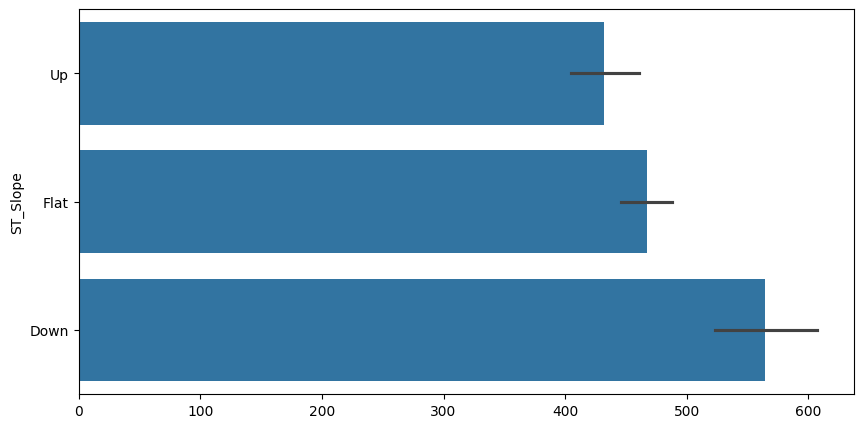

In [ ]:
#ST_Slope
#distribution
fig=plt.figure(figsize=(10,5))
sns.barplot(df['ST_Slope'], fill=True)
plt.show()

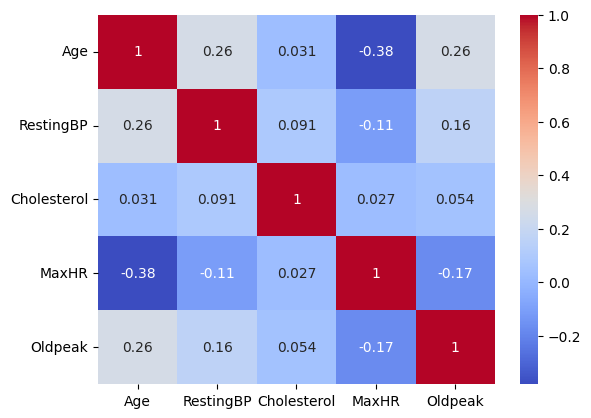

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm' )
plt.show()

#Data Preparation

In [ ]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
#Categorical columns
cat_col=x.columns[x.dtypes==object]

#numircal columns
num_col=x.columns[x.dtypes!=object]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer, cat_col)
])

#Model

In [ ]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
log_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred_log = log_reg_pipeline.predict(x_test)

In [ ]:
print("Classification Report for Logistic Regression\n", classification_report(y_test, y_pred_log))

Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.92      0.86      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Random Forest

In [ ]:
rf_pipeline_for_tuning = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [ ]:
param_grid = {
    'classifier__n_estimators': [i for i in range(100, 500, 50)],
    'classifier__max_depth': [None, 5, 10, 15]
}

In [ ]:
grid_search = GridSearchCV(
    rf_pipeline_for_tuning,
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10, 15],
                         'classifier__n_estimators': [100, 150, 200, 250, 300,
                                                      350, 400, 450]},
             scoring='f1', verbose=1)

In [ ]:
best_rf_model = grid_search.best_estimator_


In [ ]:
y_pred_rf = best_rf_model.predict(x_test)

In [ ]:
print("Classification Report for Tuned Random Forest\n", classification_report(y_test, y_pred_rf))

Classification Report for Tuned Random Forest
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.91      0.87      0.89       112

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
joblib.dump(log_reg_pipeline, 'log_.joblib')

['log_.joblib']